In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


Image (#9): Which is digit '4'


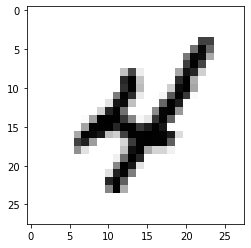

In [3]:
digit = 9 # Change to choose new digit
a = x_train[digit]
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

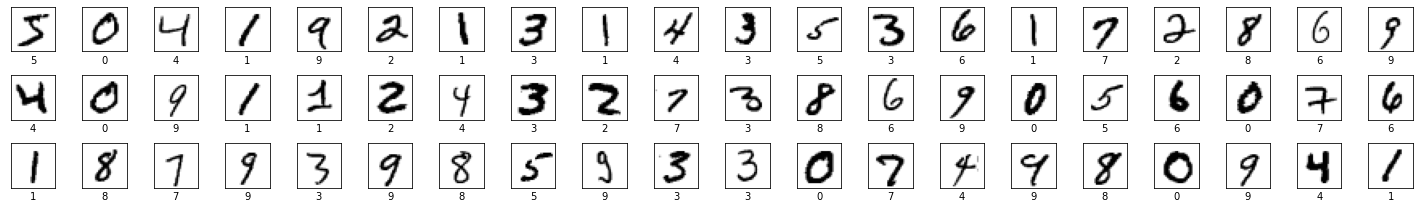

In [4]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show()

In [5]:
# normalize data
x_train = x_train.reshape(-1, 28,28,1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28,28,1).astype("float32") / 255.0

# without normalization data
x2_train = x_train.reshape(-1, 28,28,1)
x2_test = x_test.reshape(-1, 28,28,1)

# print shape
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of x_train: {x2_train.shape}")
print(f"Shape of x_test: {x2_test.shape}")

Shape of x_train: (60000, 28, 28, 1)
Shape of x_test: (10000, 28, 28, 1)
Shape of x_train: (60000, 28, 28, 1)
Shape of x_test: (10000, 28, 28, 1)


Image (#9): Which is digit '4'


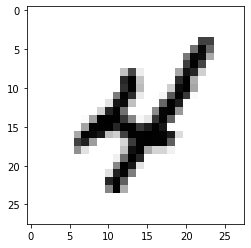

In [6]:
digit = 9 # Change to choose new digit
a = x_train[digit].reshape(28,28)
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

##**Adam Optimizer**

#Normalized Data

In [7]:
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    
    # hidden layer
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),

    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 32)          9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 128)         36992     
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [8]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [9]:
# normalize data
h = model.fit(x=x_train, y=y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 5s 7ms/step - loss: 0.2831 - accuracy: 0.9120 - val_loss: 0.1027 - val_accuracy: 0.9684
Epoch 2/5
375/375 [==============================] - 2s 7ms/step - loss: 0.0707 - accuracy: 0.9786 - val_loss: 0.0610 - val_accuracy: 0.9822
Epoch 3/5
375/375 [==============================] - 2s 7ms/step - loss: 0.0487 - accuracy: 0.9848 - val_loss: 0.0710 - val_accuracy: 0.9797
Epoch 4/5
375/375 [==============================] - 2s 7ms/step - loss: 0.0378 - accuracy: 0.9880 - val_loss: 0.0428 - val_accuracy: 0.9887
Epoch 5/5
375/375 [==============================] - 2s 7ms/step - loss: 0.0318 - accuracy: 0.9900 - val_loss: 0.0469 - val_accuracy: 0.9861


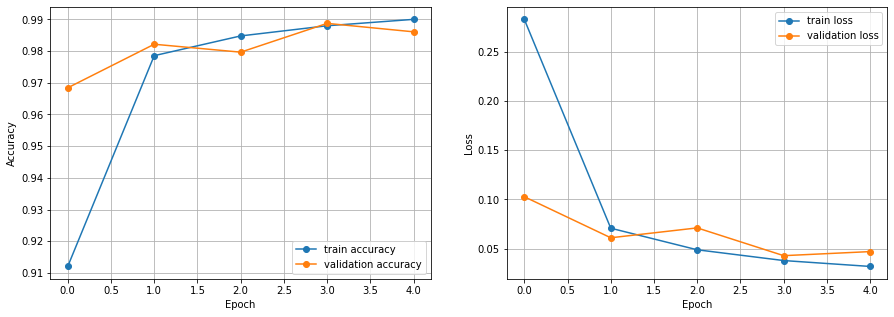

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0394 - accuracy: 0.9862

Test accuracy: 0.9861999750137329


In [12]:
predictions = model.predict(x_test)

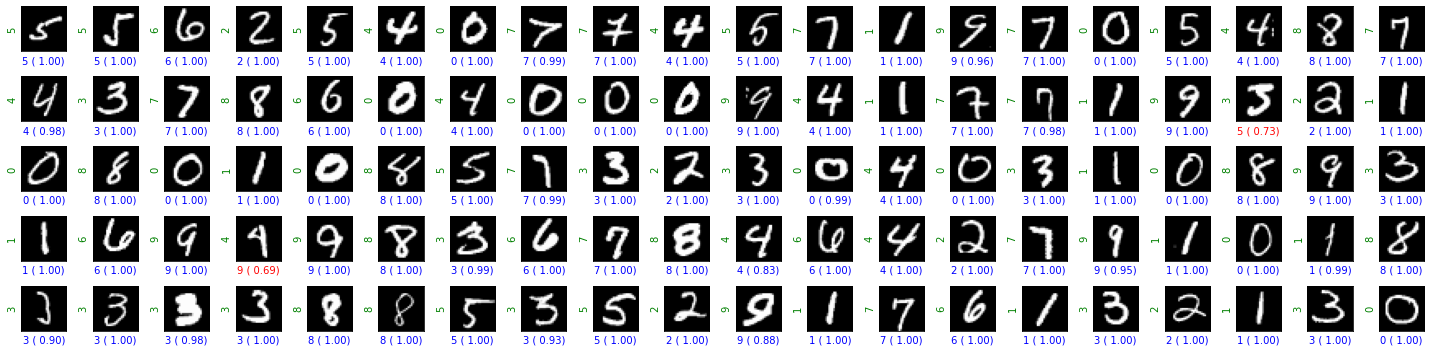

In [13]:
ROWS = 5
COLS = 20

random_indices = random.sample(range(x_test.shape[0]), ROWS*COLS)
sample_images = x_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

#Without Normalization

In [14]:
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    
    # hidden layer
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),

    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 9, 9, 32)          9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 2, 2, 128)         36992     
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)              

In [15]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [16]:
# without normalize data
h2 = model.fit(x=x2_train, y=y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 3s 7ms/step - loss: 0.2740 - accuracy: 0.9197 - val_loss: 0.0791 - val_accuracy: 0.9754
Epoch 2/5
375/375 [==============================] - 3s 7ms/step - loss: 0.0664 - accuracy: 0.9789 - val_loss: 0.0613 - val_accuracy: 0.9823
Epoch 3/5
375/375 [==============================] - 2s 7ms/step - loss: 0.0462 - accuracy: 0.9851 - val_loss: 0.0426 - val_accuracy: 0.9879
Epoch 4/5
375/375 [==============================] - 2s 7ms/step - loss: 0.0356 - accuracy: 0.9889 - val_loss: 0.0469 - val_accuracy: 0.9872
Epoch 5/5
375/375 [==============================] - 3s 7ms/step - loss: 0.0279 - accuracy: 0.9909 - val_loss: 0.0440 - val_accuracy: 0.9889


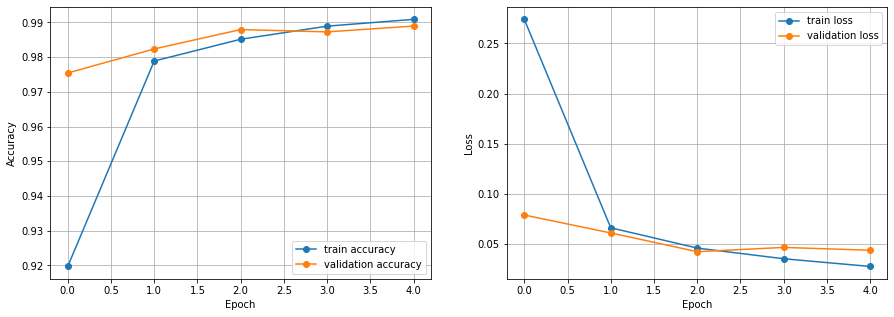

In [17]:
# without normalization
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h2.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h2.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h2.history['loss'], 'o-', label='train loss')
plt.plot(h2.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [18]:
# without normalization
test_loss2, test_acc2 = model.evaluate(x2_test, y_test)
print('\nTest accuracy:', test_acc2)

313/313 [==============================] - 1s 3ms/step - loss: 0.0332 - accuracy: 0.9893

Test accuracy: 0.989300012588501


In [19]:
# without normalization
predictions2 = model.predict(x2_test)

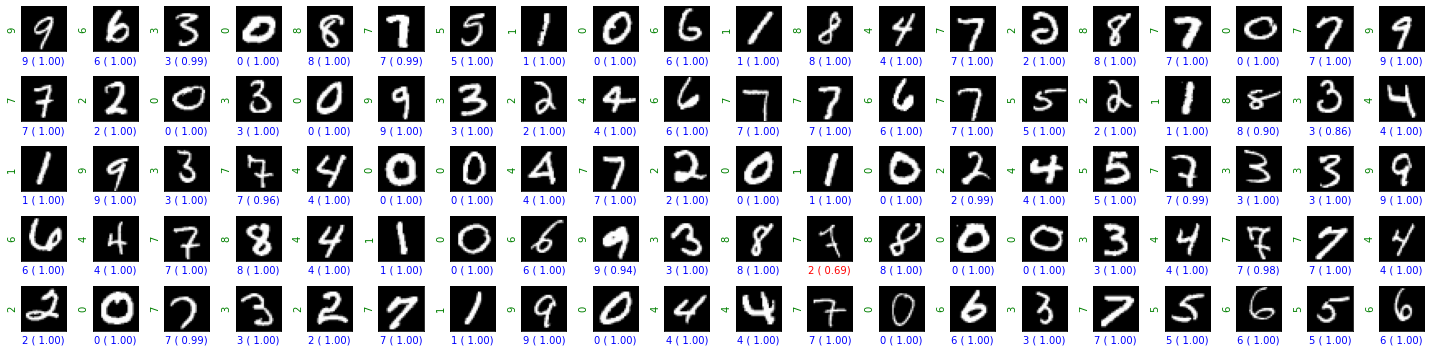

In [20]:
# without normalization
ROWS = 5
COLS = 20

random_indices = random.sample(range(x2_test.shape[0]), ROWS*COLS)
sample_images = x2_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions2 = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions2[i]) 
        confidence = predictions2[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

##**SGD Optimizer**

#Normalized Data

In [21]:
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    
    # hidden layer
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),

    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 9, 9, 32)          9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 2, 2, 128)         36992     
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)              

In [22]:
model.compile(
    optimizer='sgd', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [23]:
# normalize data
h3 = model.fit(x=x_train, y=y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 3s 7ms/step - loss: 1.9291 - accuracy: 0.4102 - val_loss: 0.7965 - val_accuracy: 0.7415
Epoch 2/5
375/375 [==============================] - 2s 6ms/step - loss: 0.4962 - accuracy: 0.8438 - val_loss: 0.3259 - val_accuracy: 0.8975
Epoch 3/5
375/375 [==============================] - 2s 7ms/step - loss: 0.2955 - accuracy: 0.9075 - val_loss: 0.2281 - val_accuracy: 0.9295
Epoch 4/5
375/375 [==============================] - 2s 7ms/step - loss: 0.2203 - accuracy: 0.9323 - val_loss: 0.1873 - val_accuracy: 0.9439
Epoch 5/5
375/375 [==============================] - 2s 7ms/step - loss: 0.1747 - accuracy: 0.9466 - val_loss: 0.1453 - val_accuracy: 0.9585


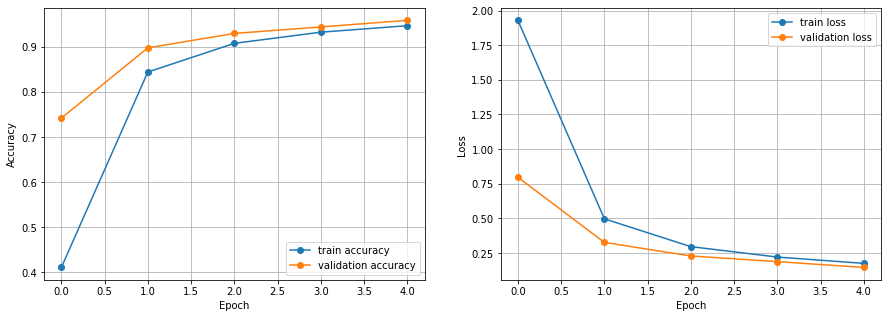

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h3.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h3.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h3.history['loss'], 'o-', label='train loss')
plt.plot(h3.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [25]:
test_loss3, test_acc3 = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1438 - accuracy: 0.9566

Test accuracy: 0.9861999750137329


In [26]:
predictions3 = model.predict(x_test)

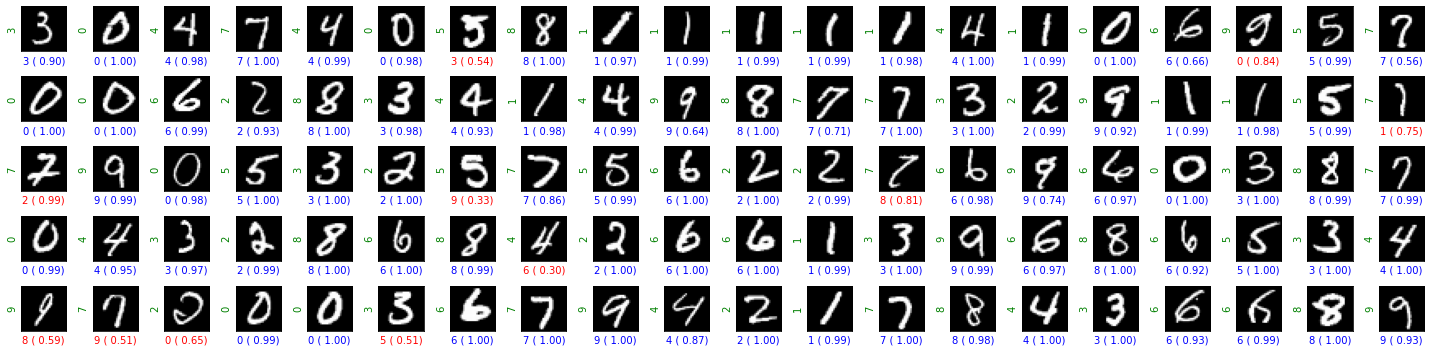

In [27]:
ROWS = 5
COLS = 20

random_indices = random.sample(range(x_test.shape[0]), ROWS*COLS)
sample_images = x_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions3 = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions3[i]) 
        confidence = predictions3[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

#Without Normalization

In [28]:
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    
    # hidden layer
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),

    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 32)        18464     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 9, 9, 32)          9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 2, 2, 128)         36992     
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)              

In [29]:
model.compile(
    optimizer='sgd', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [30]:
# without normalize data
h4 = model.fit(x=x2_train, y=y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 3s 7ms/step - loss: 1.7407 - accuracy: 0.4641 - val_loss: 0.6162 - val_accuracy: 0.8075
Epoch 2/5
375/375 [==============================] - 2s 6ms/step - loss: 0.4258 - accuracy: 0.8687 - val_loss: 0.2895 - val_accuracy: 0.9103
Epoch 3/5
375/375 [==============================] - 2s 6ms/step - loss: 0.2632 - accuracy: 0.9196 - val_loss: 0.2019 - val_accuracy: 0.9391
Epoch 4/5
375/375 [==============================] - 2s 7ms/step - loss: 0.1955 - accuracy: 0.9395 - val_loss: 0.1598 - val_accuracy: 0.9524
Epoch 5/5
375/375 [==============================] - 2s 6ms/step - loss: 0.1535 - accuracy: 0.9526 - val_loss: 0.1466 - val_accuracy: 0.9550


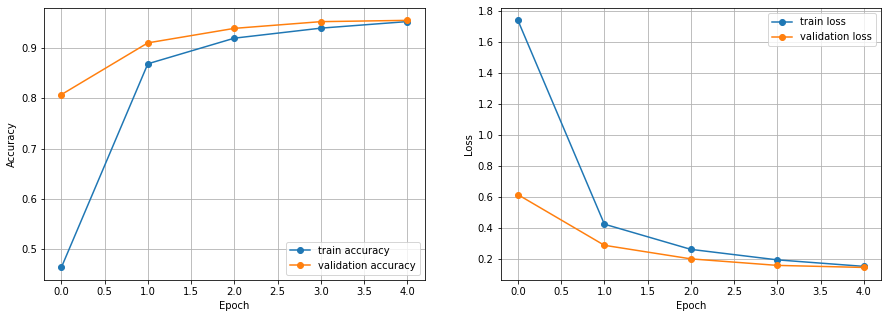

In [31]:
# without normalization
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h4.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h4.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h4.history['loss'], 'o-', label='train loss')
plt.plot(h4.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [32]:
# without normalization
test_loss4, test_acc4 = model.evaluate(x2_test, y_test)
print('\nTest accuracy:', test_acc2)

313/313 [==============================] - 1s 3ms/step - loss: 0.1458 - accuracy: 0.9558

Test accuracy: 0.989300012588501


In [33]:
# without normalization
predictions4 = model.predict(x2_test)

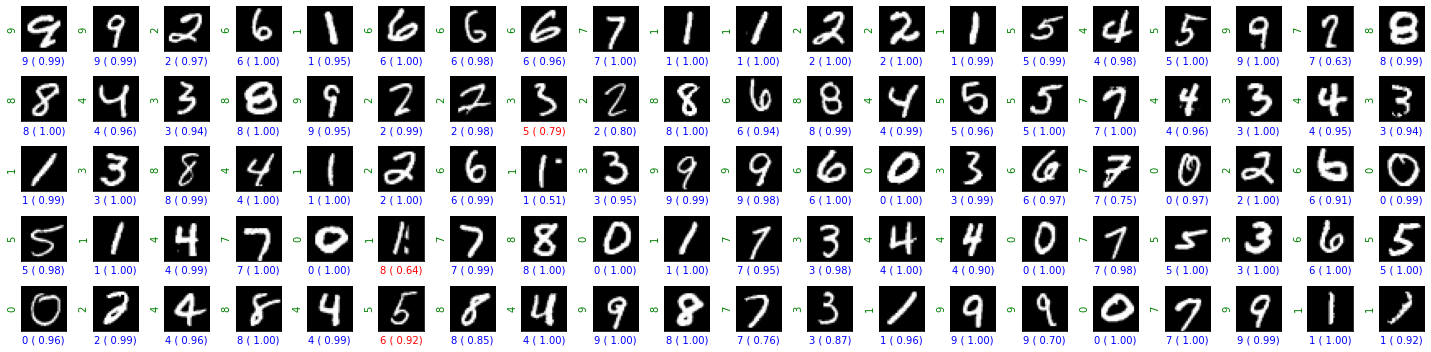

In [34]:
# without normalization
ROWS = 5
COLS = 20

random_indices = random.sample(range(x2_test.shape[0]), ROWS*COLS)
sample_images = x2_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions4 = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions4[i]) 
        confidence = predictions4[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

##**RMSProp Optimizer**

#Normalized Data

In [35]:
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    
    # hidden layer
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),

    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 32)        18464     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 9, 9, 32)          9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 2, 2, 128)         36992     
_________________________________________________________________
flatten_4 (Flatten)          (None, 512)              

In [36]:
model.compile(
    optimizer='RMSProp', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [37]:
# normalize data
h5 = model.fit(x=x_train, y=y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 3s 7ms/step - loss: 0.2553 - accuracy: 0.9186 - val_loss: 0.0742 - val_accuracy: 0.9774
Epoch 2/5
375/375 [==============================] - 3s 7ms/step - loss: 0.0652 - accuracy: 0.9794 - val_loss: 0.0521 - val_accuracy: 0.9837
Epoch 3/5
375/375 [==============================] - 3s 7ms/step - loss: 0.0448 - accuracy: 0.9858 - val_loss: 0.0525 - val_accuracy: 0.9859
Epoch 4/5
375/375 [==============================] - 3s 7ms/step - loss: 0.0331 - accuracy: 0.9897 - val_loss: 0.0379 - val_accuracy: 0.9894
Epoch 5/5
375/375 [==============================] - 3s 7ms/step - loss: 0.0256 - accuracy: 0.9916 - val_loss: 0.0387 - val_accuracy: 0.9884


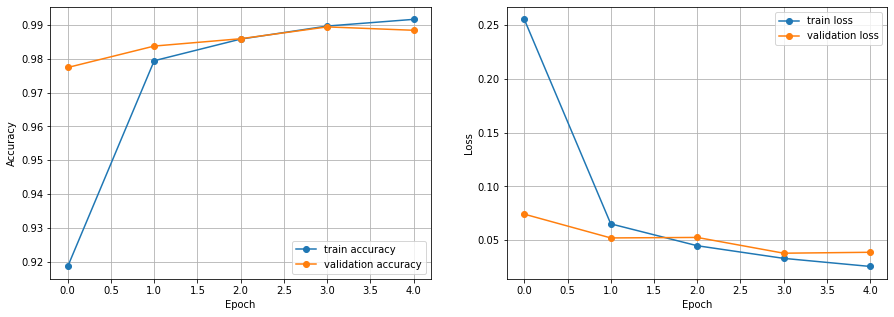

In [38]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h5.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h5.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h5.history['loss'], 'o-', label='train loss')
plt.plot(h5.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [39]:
test_loss5, test_acc5 = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0283 - accuracy: 0.9910

Test accuracy: 0.9861999750137329


In [40]:
predictions5 = model.predict(x_test)

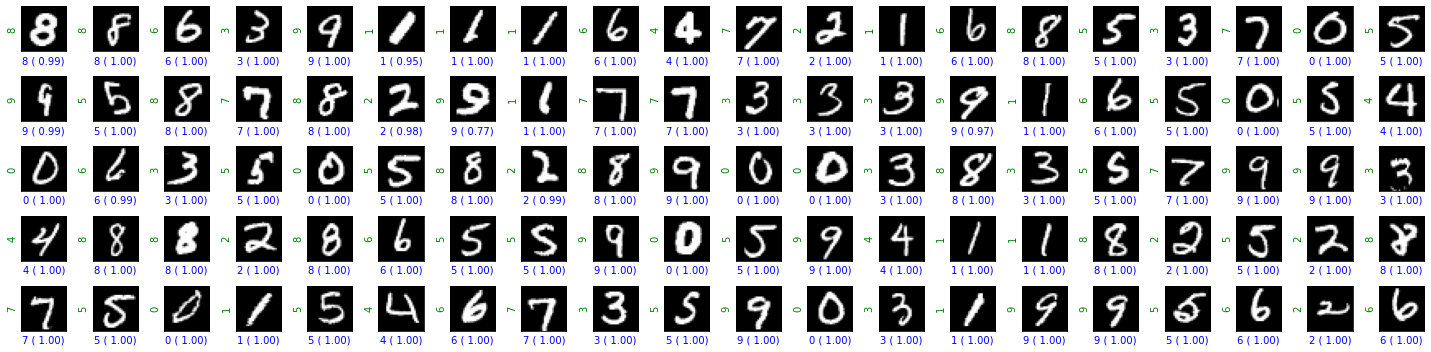

In [41]:
ROWS = 5
COLS = 20

random_indices = random.sample(range(x_test.shape[0]), ROWS*COLS)
sample_images = x_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions5 = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions5[i]) 
        confidence = predictions5[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

#Without Normalization

In [42]:
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    
    # hidden layer
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),

    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 11, 11, 32)        18464     
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 9, 9, 32)          9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 2, 2, 128)         36992     
_________________________________________________________________
flatten_5 (Flatten)          (None, 512)              

In [43]:
model.compile(
    optimizer='RMSProp', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [44]:
# without normalize data
h6 = model.fit(x=x2_train, y=y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 3s 7ms/step - loss: 0.2569 - accuracy: 0.9188 - val_loss: 0.0717 - val_accuracy: 0.9791
Epoch 2/5
375/375 [==============================] - 3s 7ms/step - loss: 0.0640 - accuracy: 0.9796 - val_loss: 0.0634 - val_accuracy: 0.9798
Epoch 3/5
375/375 [==============================] - 3s 7ms/step - loss: 0.0431 - accuracy: 0.9868 - val_loss: 0.0649 - val_accuracy: 0.9808
Epoch 4/5
375/375 [==============================] - 3s 7ms/step - loss: 0.0319 - accuracy: 0.9902 - val_loss: 0.0366 - val_accuracy: 0.9899
Epoch 5/5
375/375 [==============================] - 3s 7ms/step - loss: 0.0240 - accuracy: 0.9920 - val_loss: 0.0375 - val_accuracy: 0.9890


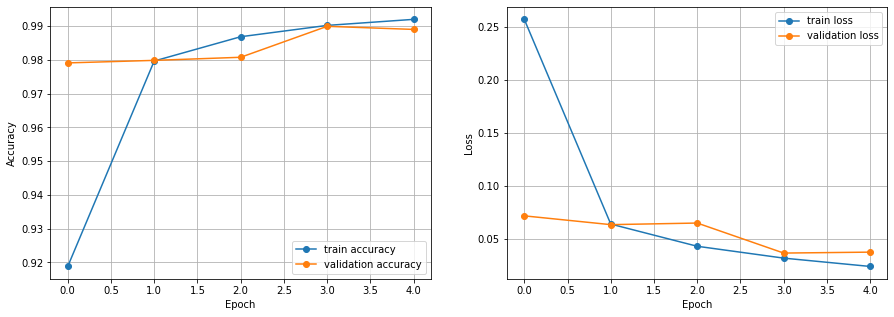

In [45]:
# without normalization
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h6.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h6.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h6.history['loss'], 'o-', label='train loss')
plt.plot(h6.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [46]:
# without normalization
test_loss6, test_acc6 = model.evaluate(x2_test, y_test)
print('\nTest accuracy:', test_acc2)

313/313 [==============================] - 1s 3ms/step - loss: 0.0307 - accuracy: 0.9911

Test accuracy: 0.989300012588501


In [47]:
# without normalization
predictions6 = model.predict(x2_test)

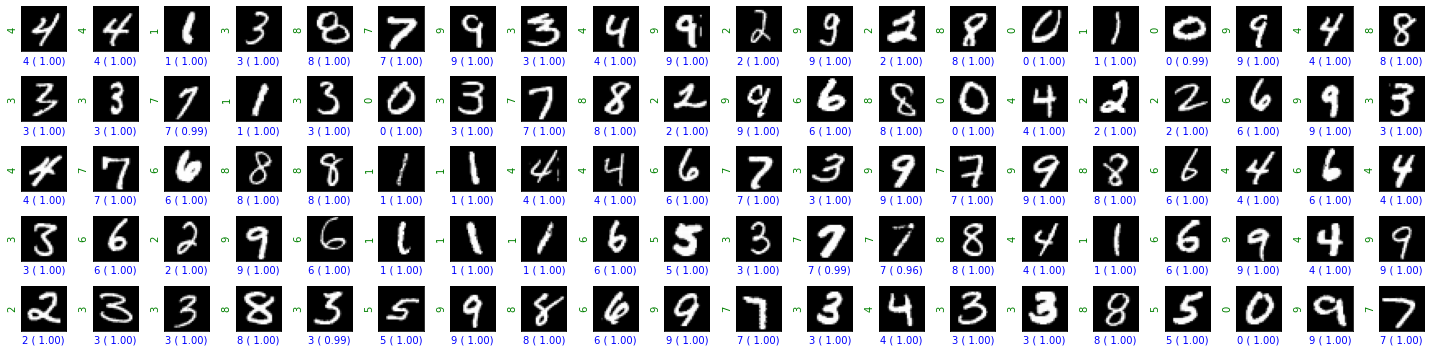

In [48]:
# without normalization
ROWS = 5
COLS = 20

random_indices = random.sample(range(x2_test.shape[0]), ROWS*COLS)
sample_images = x2_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions6 = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions6[i]) 
        confidence = predictions6[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()